## EDA
## FEATURE ENGINEERING 
## FEATURE SELECTION 
## FEATURE SCALING 
ON BOSTON HOUSE PRICES

#### ALL PRE PROCESSING OPEARTIONS

- Understanding the Problem Statement
- Data Collection
- Inspect data
- Exploratory data analysis
Missing values
Outlier analsys
Distributions
Correlation Matrix
Relationship with target variable
- Feature Enginneering
handling missing values
skewness reduction
features interaction
one hot encoding for Categorical Variables 
- Feature Selection
Remove Low-Variance Features
Correlation-Based Feature Removal
Feature Importance
Recursive Feature Elimination (RFE)
- Data Pre-Processing
Standardize/Normalize the data
Split into training and testing sets
- Feature scaling
Min-Max Scaling
Visualization


# Import data

In [722]:
#IMPORTED DATA from kaggle api directly
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vikrishnan/boston-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /Users/manojrammopati/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1


In [723]:
import pandas as pd

# Path to the housing.csv file
csv_path = "/Users/manojrammopati/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1/housing.csv"

# Load the CSV into a DataFrame
boston_df = pd.read_csv(csv_path, header=None)

# View the first few rows
print(boston_df.head())


                                                   0
0   0.00632  18.00   2.310  0  0.5380  6.5750  65...
1   0.02731   0.00   7.070  0  0.4690  6.4210  78...
2   0.02729   0.00   7.070  0  0.4690  7.1850  61...
3   0.03237   0.00   2.180  0  0.4580  6.9980  45...
4   0.06905   0.00   2.180  0  0.4580  7.1470  54...


#### Assigning column names and making structured

In [724]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv("/Users/manojrammopati/.cache/kagglehub/datasets/vikrishnan/boston-house-prices/versions/1/housing.csv", header=None, delimiter=r"\s+", names=column_names)
print(boston_df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## Columns information provided by kaggle

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

#### Summary of Relationships
- **Positive Correlations with Price:**
  - ZN (larger plots of land)
  - RM (larger homes)
  - CHAS (near the Charles River)
  - DIS (desirable commuting distances)
- **Negative Correlations with Price:**
  - CRIM (high crime rate)
  - NOX (pollution)
  - LSTAT (low socioeconomic status)
  - TAX (higher property taxes)

These features give a detailed view of factors that influence housing prices in the Boston area.

In [725]:
print(boston_df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [726]:
print(boston_df.tail())

        CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  


In [727]:
print(boston_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [728]:
print(boston_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

## observation

##### ZN and CHAS are showing 0's for 25th,50th Percentile in common and chas has 75th percentile also '0'
-ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
-CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
##### Both variables are conditional and categorical variables. First assumption would be that these coulmns may not be useful in regression task in future such as predicting MEDV (Median value of owner-occupied homes).
##### Max value of MEDV. From the original data description, it says:Variable 14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

In [729]:
print(boston_df.shape)

(506, 14)


# 2. Exploratory Data Analysis (EDA)

## (A) Checking Missing Values

There is no missing values in this dataset.

In [730]:
print(boston_df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## (B) Understand Distributions Before

Visualizing the distributions of variables:

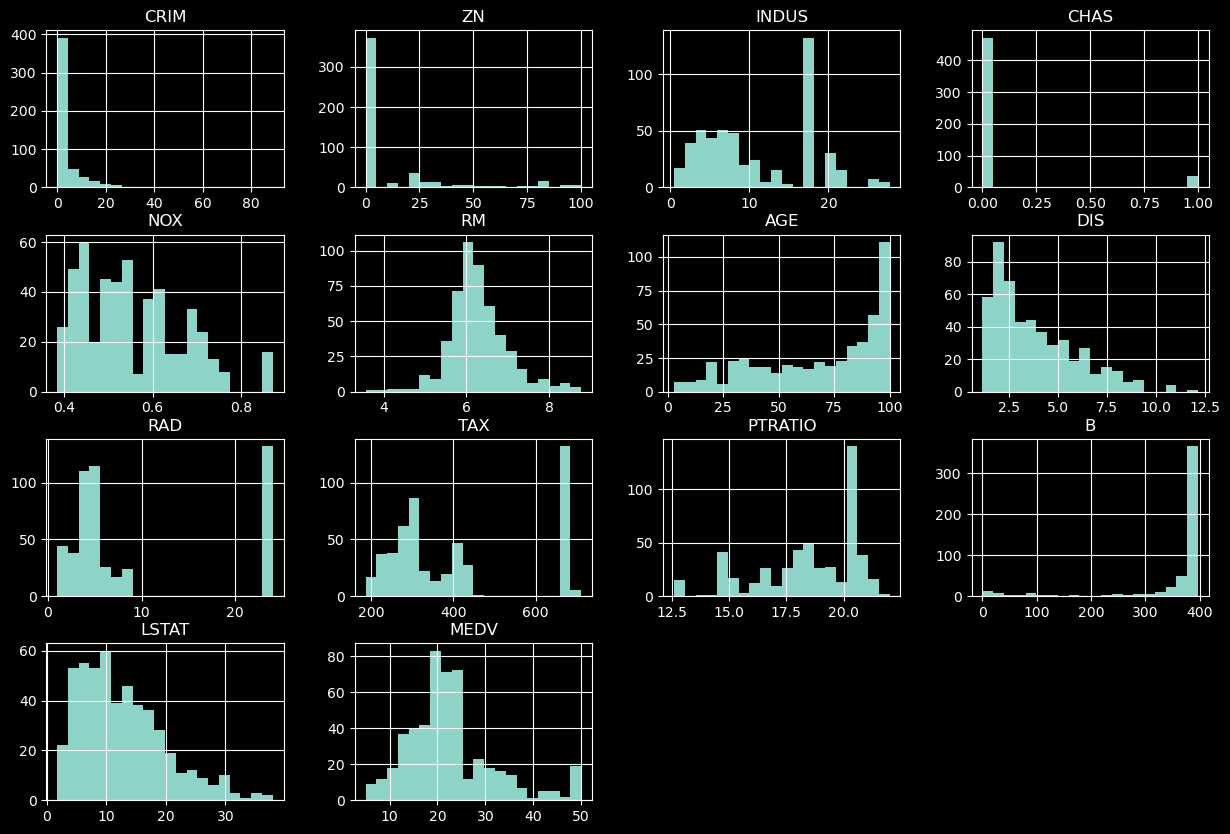

In [731]:
import matplotlib.pyplot as plt
import seaborn as sns

boston_df.hist(bins=20, figsize=(15, 10))
plt.show()


## observation
General Insights
Right-Skewed Features (e.g., CRIM, DIS, LSTAT):
Log transformation or scaling may improve linearity for modeling.
Categorical/Discrete Features (e.g., CHAS, RAD):
Handle carefully; binary features like CHAS can stay as-is.
Normally Distributed Features (e.g., RM, MEDV):
These features are already in a good format for regression models.

# (D) Correlation Matrix Before

## Find relationships between variables:

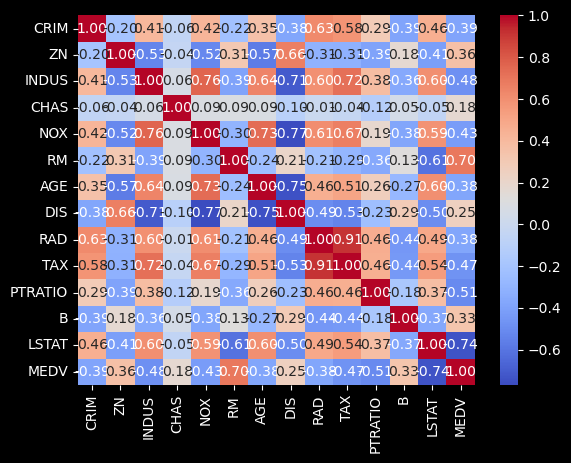

In [732]:
corr_matrix = boston_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


<Axes: >

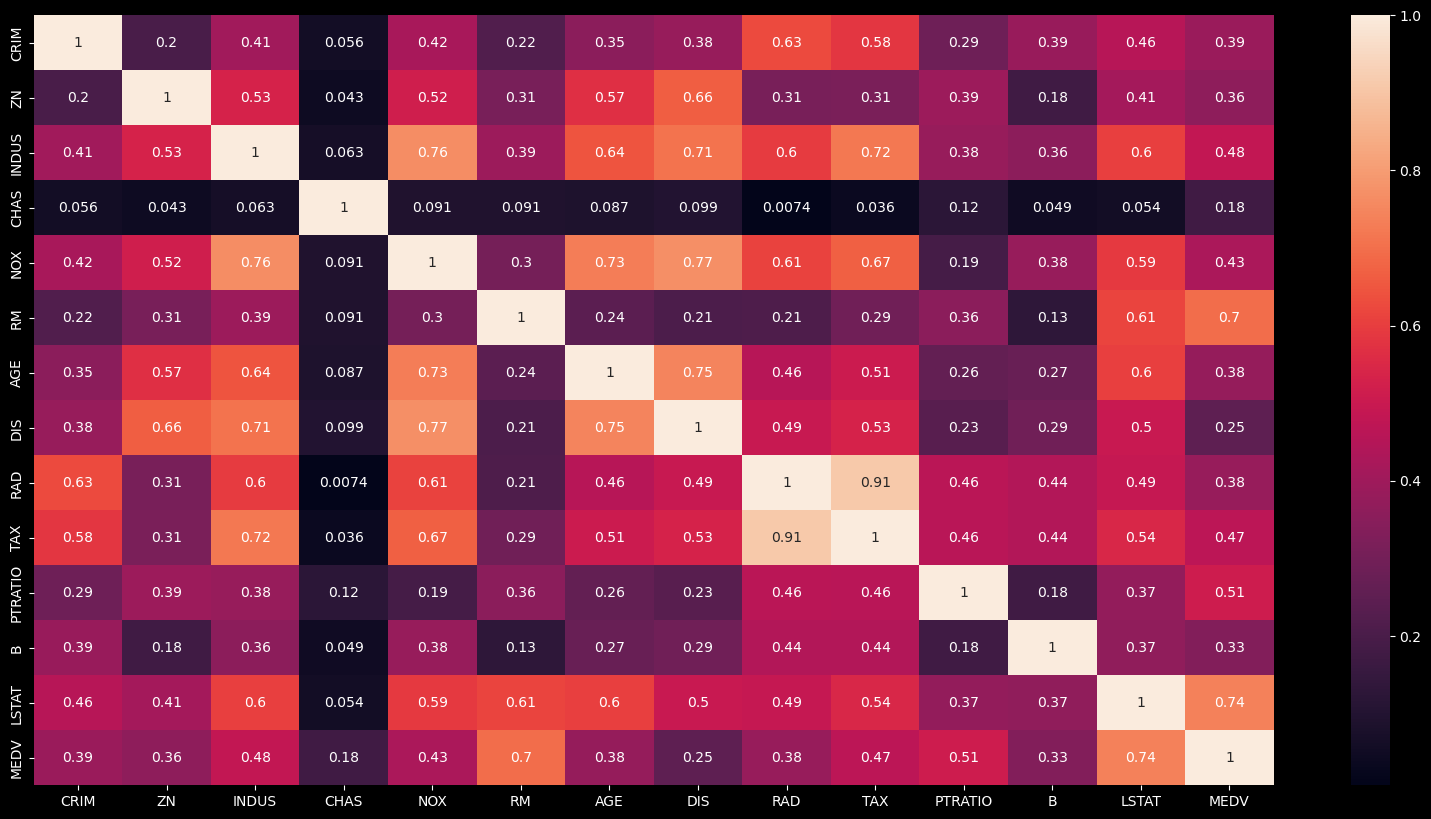

In [733]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_df.corr().abs(),  annot=True)

## observation

### These distributions and heatmap before the outlier analysis
From correlation matrix, we see TAX and RAD are highly correlated features.
The Features LSTAT,RM,PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. 
we can plot these columns against MEDV.

# (E) Relationship with Target (MEDV)

## Scatter plots for key relationships:

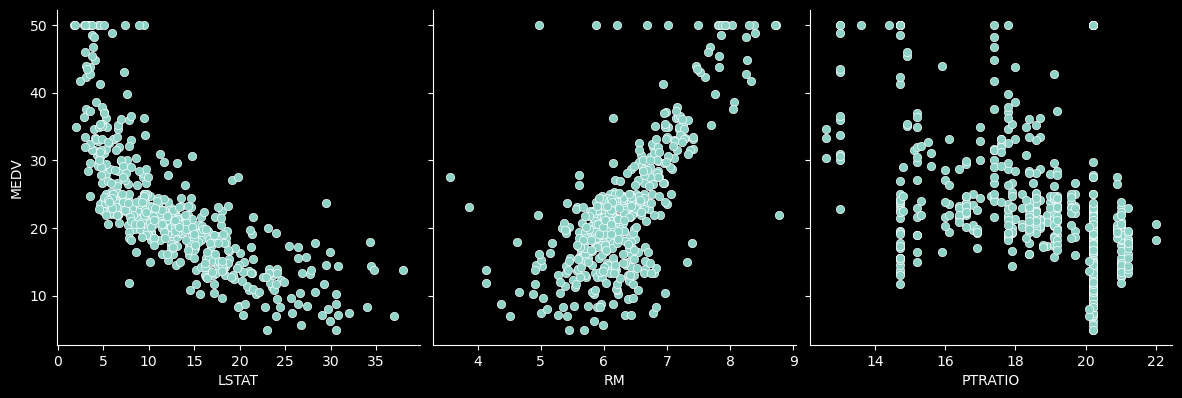

In [734]:
sns.pairplot(boston_df, x_vars=['LSTAT', 'RM', 'PTRATIO'], y_vars='MEDV', height=4)
plt.show()


# (C) Outliers Analysis

## Use boxplots to identify outliers:

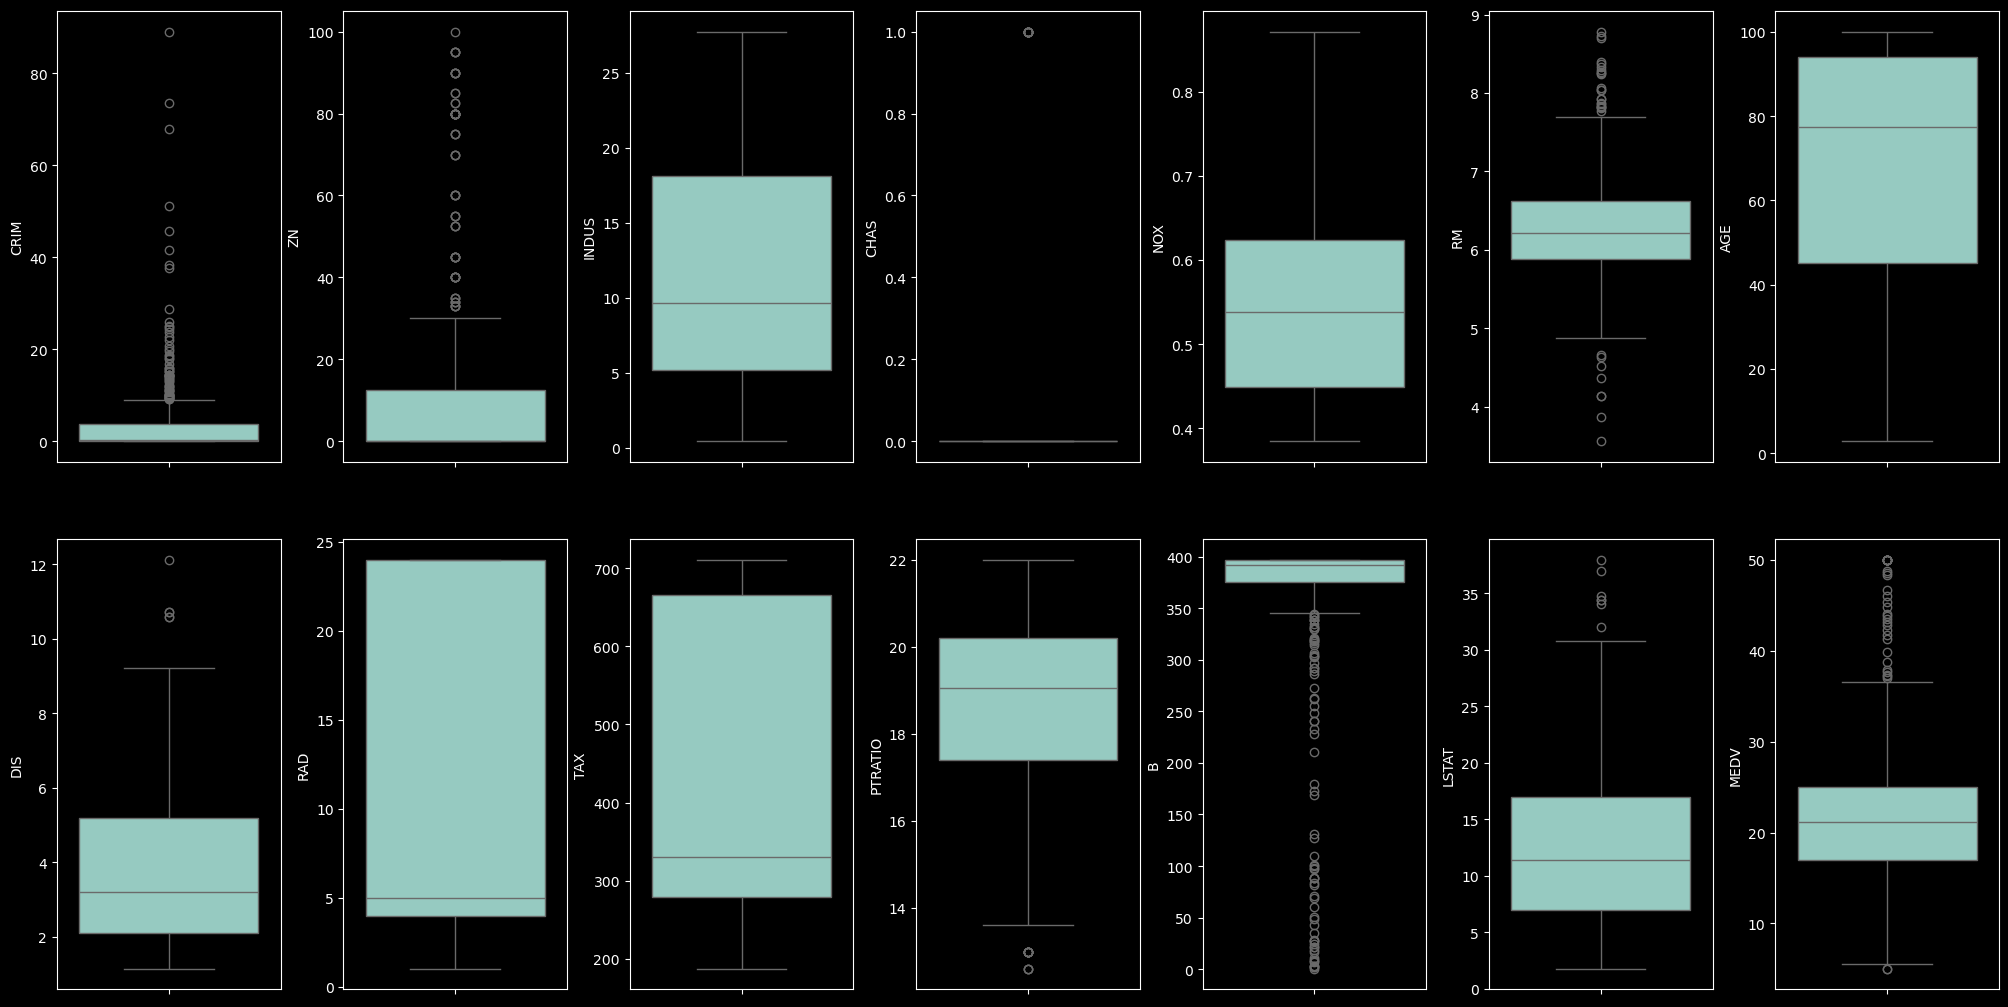

In [735]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.boxplot(y=k, data=boston_df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [736]:
for k, v in boston_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston_df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


### Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [737]:
boston_df = boston_df[~(boston_df['MEDV'] >= 50.0)]
print(np.shape(boston_df))

(490, 14)


## (B) Understand Distributions After Outlier Analysis

Visualizing the distributions of variables:


Let's see how the features with MEDV distributions looks like now

Note: distplot is going to deprecated so used histplot

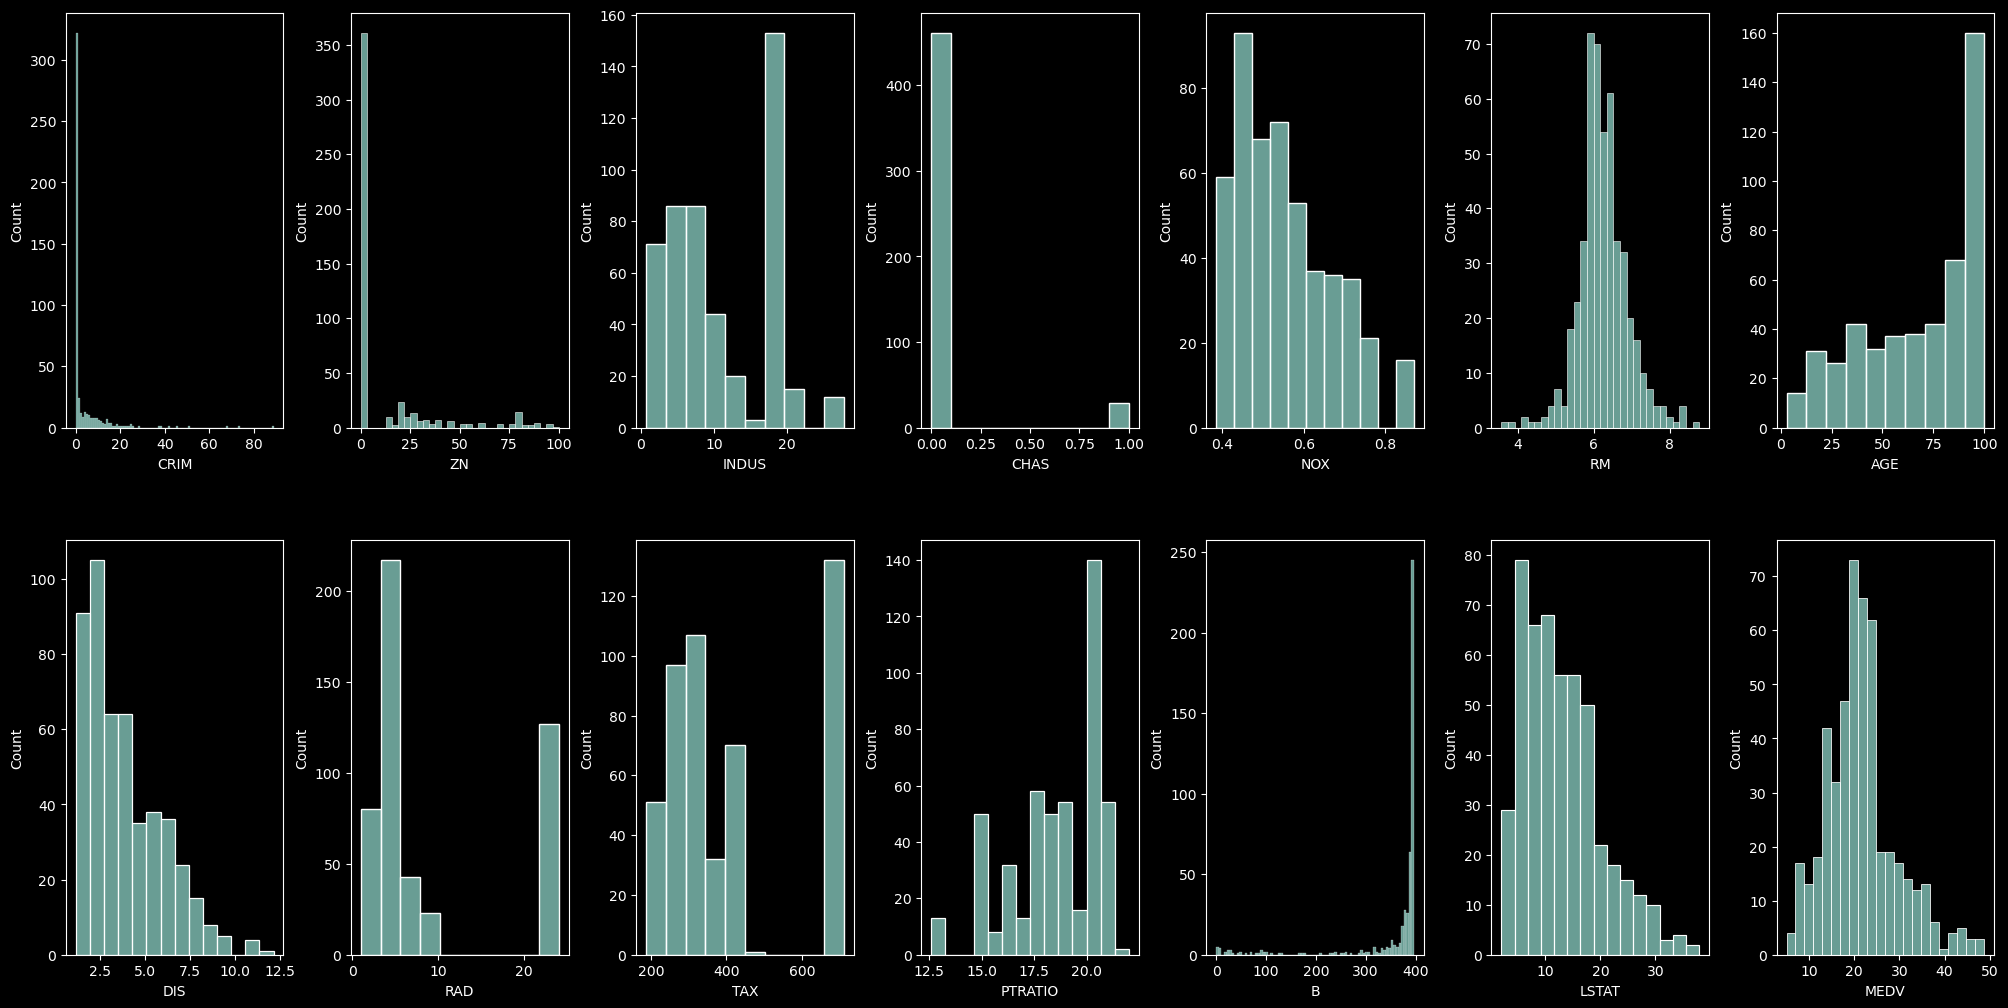

In [738]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in boston_df.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### NOTICE THE CHANGES IN MEDV DISTRIBUTION

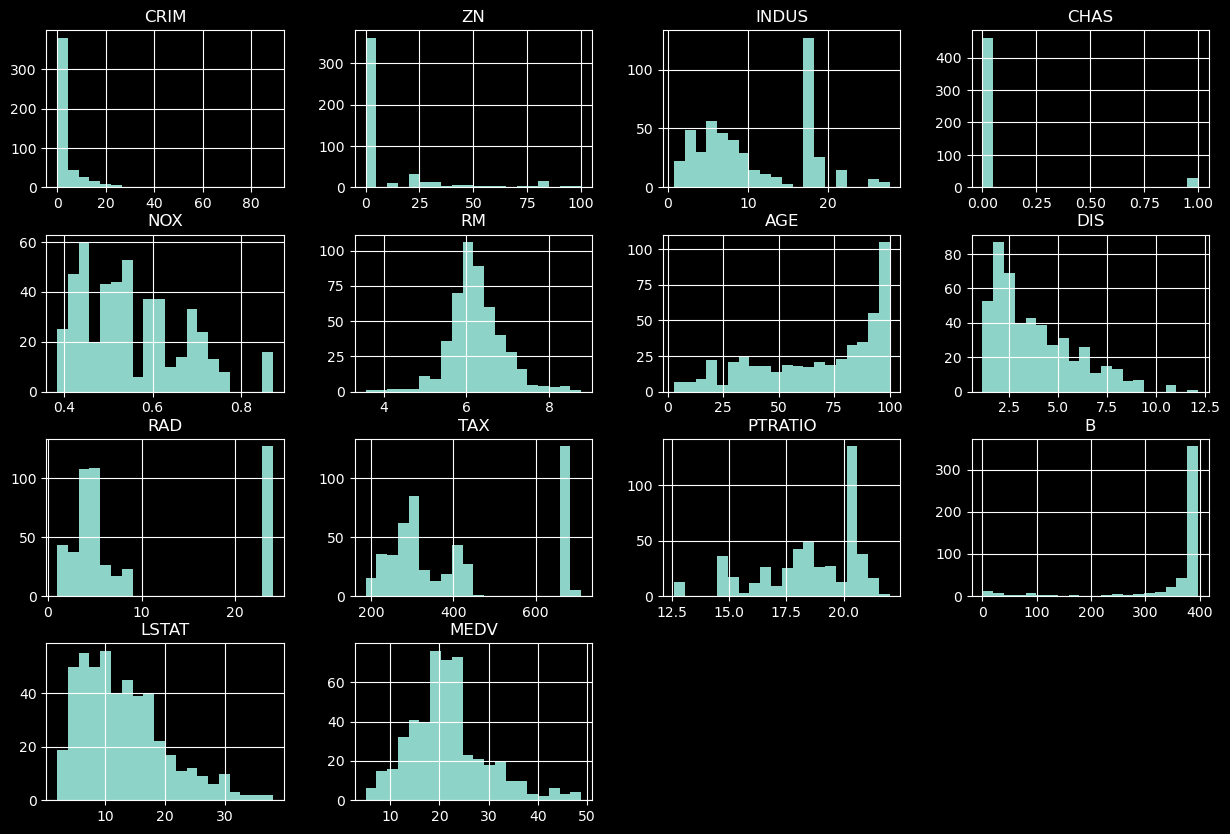

In [739]:
import matplotlib.pyplot as plt
import seaborn as sns

boston_df.hist(bins=20, figsize=(15, 10))
plt.show()

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions.
Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have normal or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

# (D) Correlation Matrix After Outlier Analysis

<Axes: >

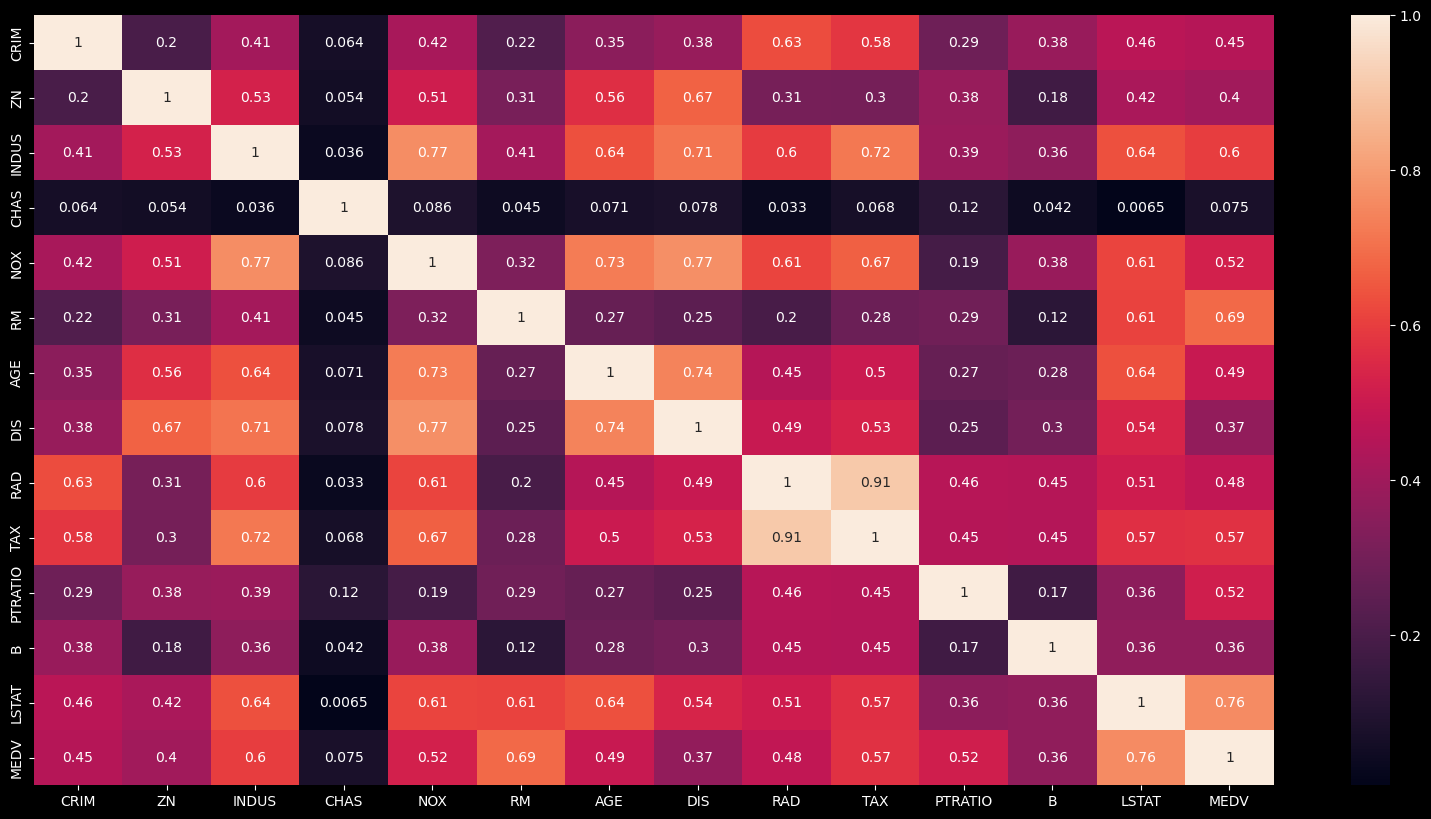

In [740]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_df.corr().abs(),  annot=True)

# 2. Feature Engineering
## (F) Transform Skewed Features

# RIGHT SKEWED

Applying Log Transformation for Right-Skewed Features to reduce skewness

Log transformation compresses the range of larger values and spreads out smaller ones.


In [741]:
import numpy as np

# Apply log1p (log(1 + x)) to avoid issues with zero or negative values
skewed_features = ['CRIM', 'ZN', 'DIS', 'LSTAT']
for feature in skewed_features:
    boston_df[feature] = np.log1p(boston_df[feature])


### DISTRIBUTIONS AFTER LOG TRANSFORMATION ON FEATURES

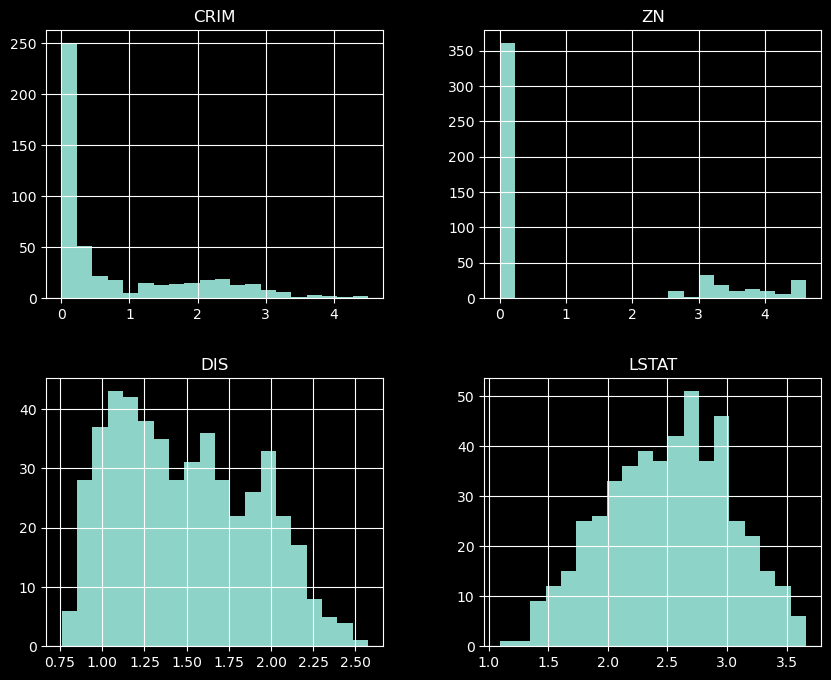

In [742]:
boston_df[skewed_features].hist(bins=20, figsize=(10, 8))
plt.show()


### STILL CRIM ZN ARE SKEWED SO USING POWER TRANSFORMATION

### Applying Power Transformation

If log transformation doesn’t fully normalize the data, try Box-Cox or Yeo-Johnson transformations.

In [743]:
from sklearn.preprocessing import PowerTransformer

# Use PowerTransformer for features with skewness
#pt = PowerTransformer(method='yeo-johnson')  # Use 'box-cox' if values > 0
#boston_df[skewed_features] = pt.fit_transform(boston_df[skewed_features])

In [744]:
# Box-Cox or Yeo-Johnson transformation
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
boston_df[['CRIM_N', 'ZN_N']] = pt.fit_transform(boston_df[['CRIM', 'ZN']])


## TRANSFORMED CRIM ZN WITH POWER TRANSFORMATION

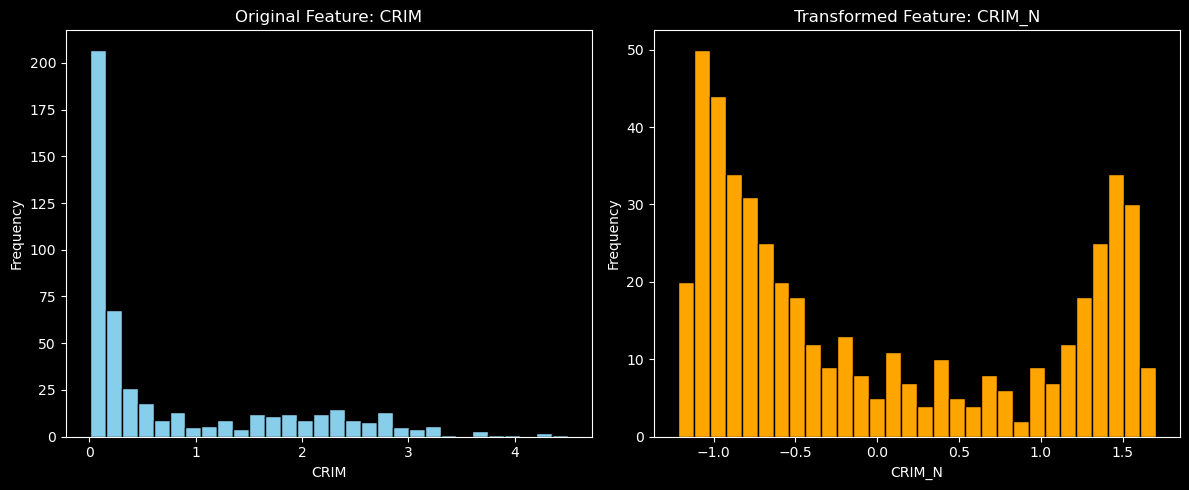

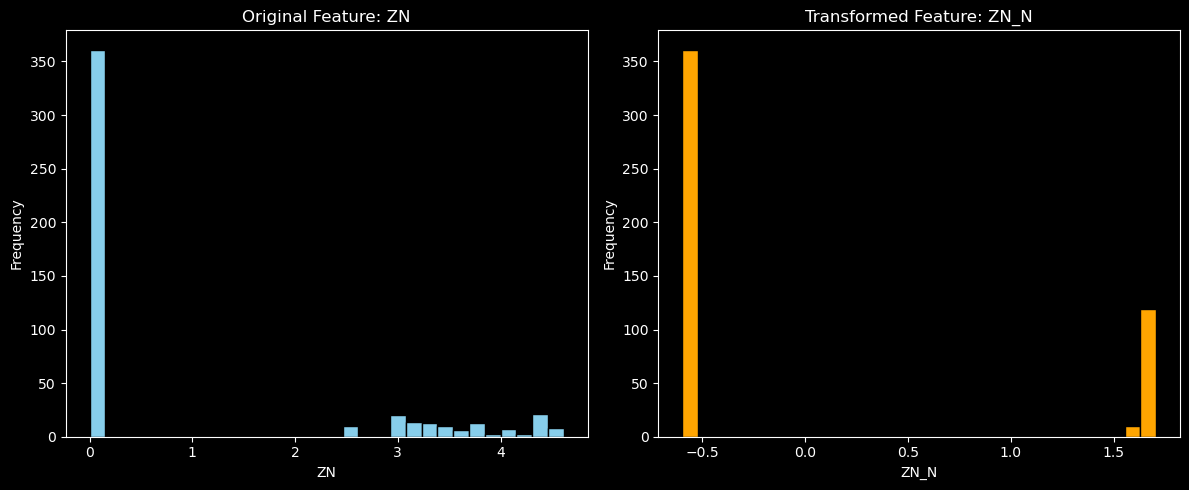

In [745]:
import matplotlib.pyplot as plt

# Original and transformed features
features = ['CRIM', 'ZN']
transformed_features = ['CRIM_N', 'ZN_N']

# Plot histograms for original and transformed features
for feature, transformed_feature in zip(features, transformed_features):
    plt.figure(figsize=(12, 5))
    
    # Original feature
    plt.subplot(1, 2, 1)
    plt.hist(boston_df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Original Feature: {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Transformed feature
    plt.subplot(1, 2, 2)
    plt.hist(boston_df[transformed_feature], bins=30, color='orange', edgecolor='black')
    plt.title(f'Transformed Feature: {transformed_feature}')
    plt.xlabel(transformed_feature)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


In [746]:
# Replace the original features with the transformed ones
boston_df['CRIM'] = boston_df['CRIM_N']
boston_df['ZN'] = boston_df['ZN_N']

# Drop the temporary transformed columns if they were added separately
boston_df.drop(columns=['CRIM_N', 'ZN_N'], inplace=True)


### REPLACED WITH TRANSFORMED DISTRIBUTIONS

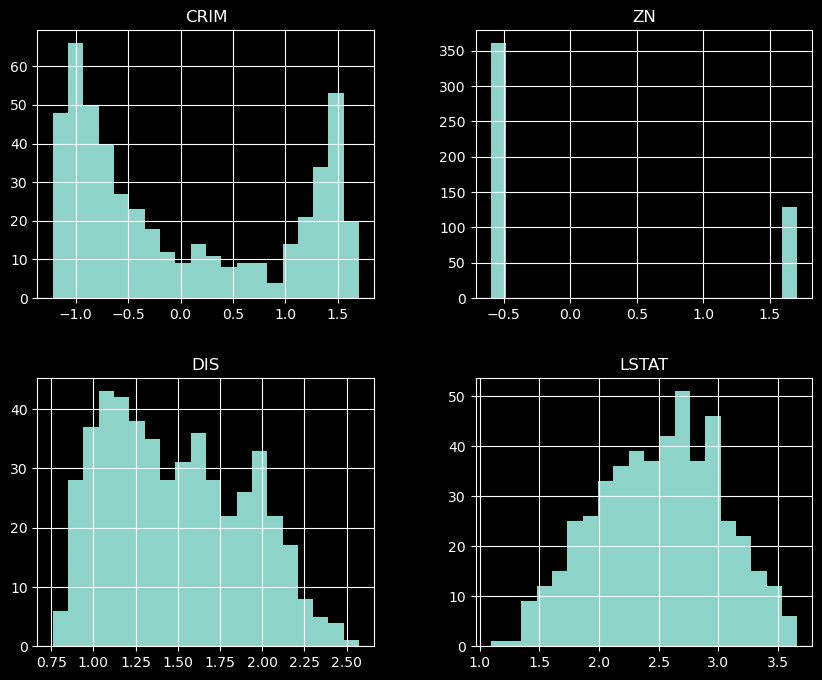

In [747]:
boston_df[skewed_features].hist(bins=20, figsize=(10, 8))
plt.show()

# 

# LEFT SKEWED
To handle left-skewed features like "B", you can apply transformations that reverse the skewness, such as:

In [748]:
#1. Inverse Transformation
#The inverse transformation compresses the higher values and stretches the lower values:

boston_df['B'] = 1 / boston_df['B']


In [749]:
# 2. Square Transformation
# Squaring the values can reduce left skewness:
boston_df['B'] = boston_df['B'] ** 2


In [750]:
#3. Square Root Transformation
#Taking the square root can also help reduce left skewness:
import numpy as np
boston_df['B'] = np.sqrt(boston_df['B'])


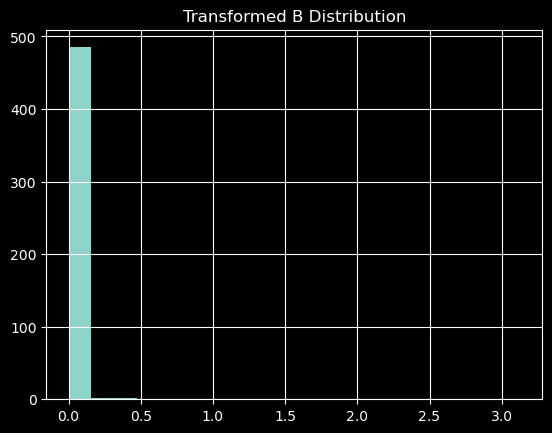

In [751]:
import matplotlib.pyplot as plt
boston_df['B'].hist(bins=20)
plt.title('Transformed B Distribution')
plt.show()


"B" FEATURE IS RIGHT SKEWED NOW SO WE CAN PERFORM LOG TRANSFORMATION OR POWER TRANSFORMATION

In [752]:
boston_df['B'] = np.log1p(boston_df['B'])

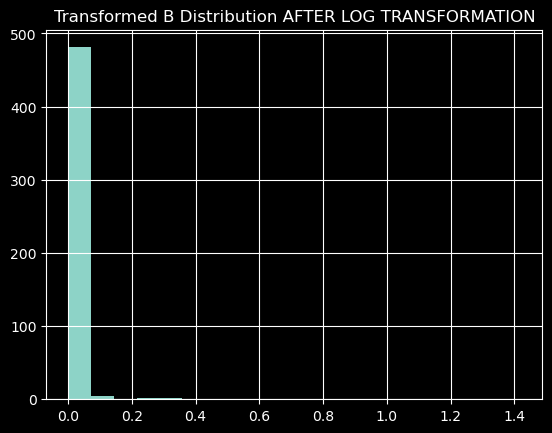

In [753]:
import matplotlib.pyplot as plt
boston_df['B'].hist(bins=20)
plt.title('Transformed B Distribution AFTER LOG TRANSFORMATION')
plt.show()

In [754]:
pt = PowerTransformer(method='yeo-johnson')
boston_df[['B']] = pt.fit_transform(boston_df[['B']])

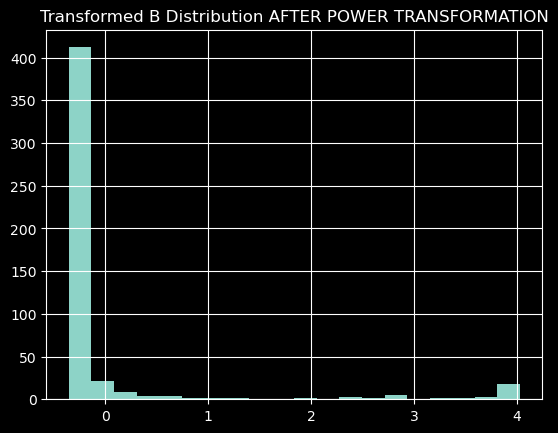

In [755]:
import matplotlib.pyplot as plt
boston_df['B'].hist(bins=20)
plt.title('Transformed B Distribution AFTER POWER TRANSFORMATION')
plt.show()

### After power transformation "B" looks good now  

# (B) Understand Distributions After Transformations

## Visualizing the distribution of variables:

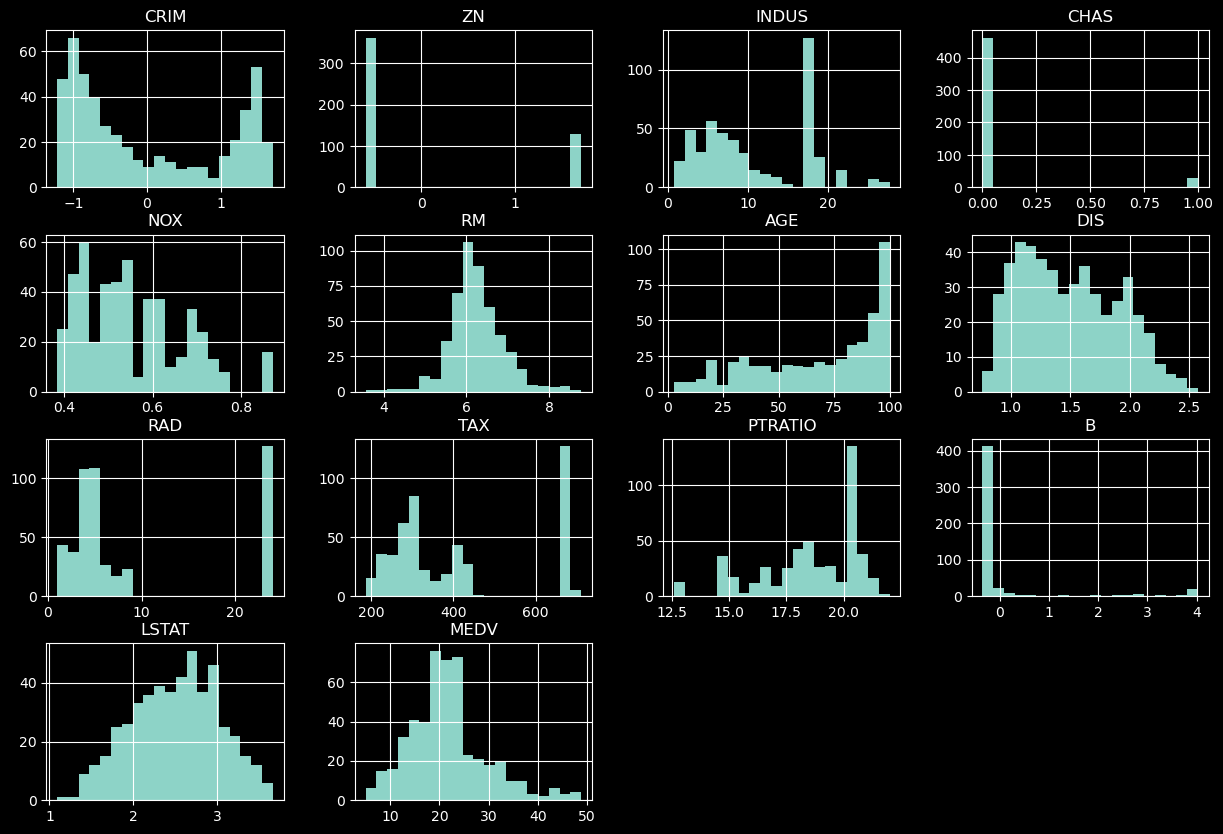

In [756]:
import matplotlib.pyplot as plt
import seaborn as sns

boston_df.hist(bins=20, figsize=(15, 10))
plt.show()

# (D) Correlation Matrix Analysis 

## Re-checking correlations after skewness transformation to identify:

## Features strongly correlated with the target variable (MEDV).

## Pairs of features with high correlation (multicollinearity).

<Axes: >

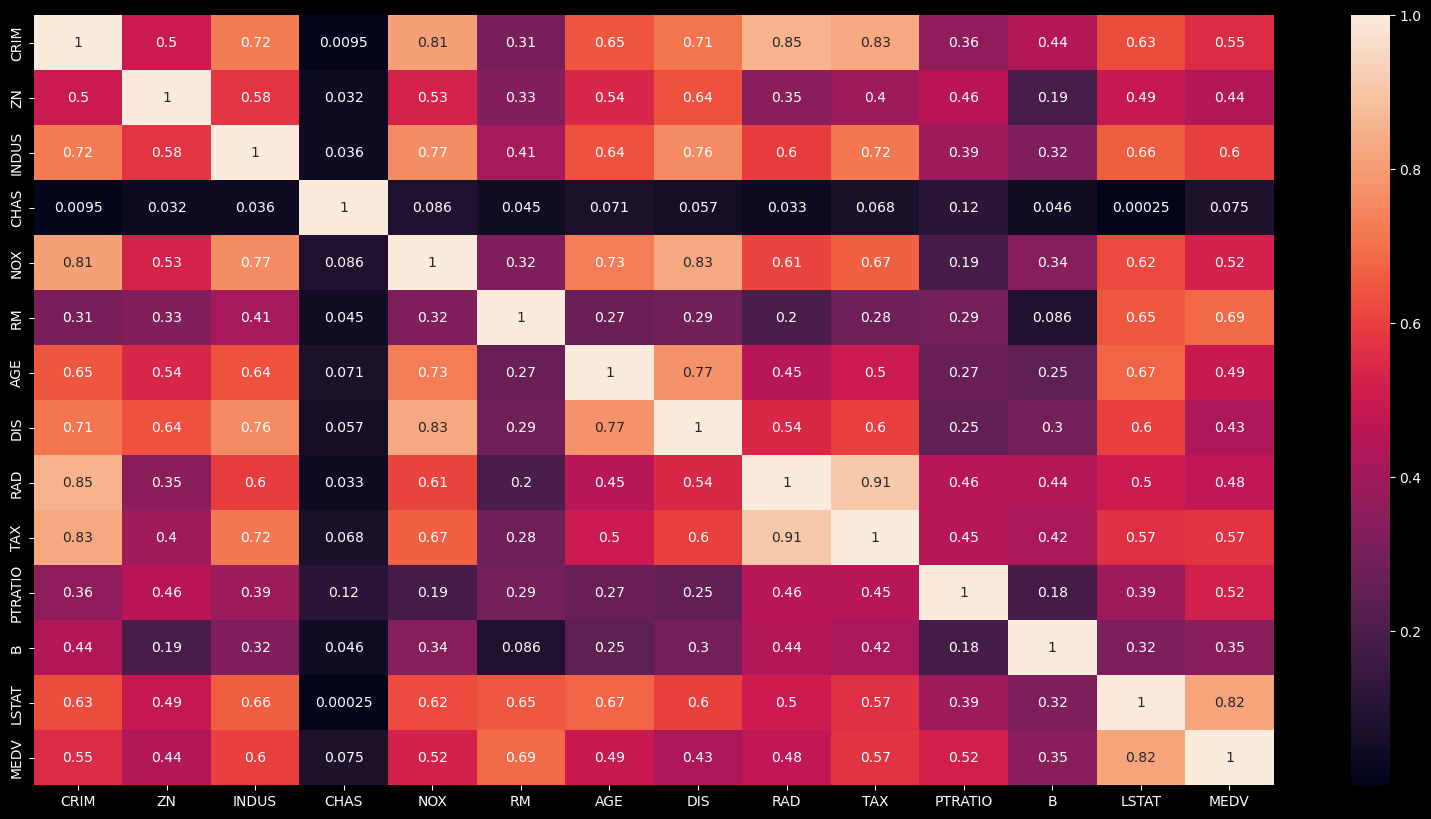

In [757]:
plt.figure(figsize=(20, 10))
sns.heatmap(boston_df.corr().abs(),  annot=True)

#### MOST IMP PREDICTORS LIKE "RM" AND "LSTAT" IMPROVED A LOT

# (G) Relation b/w Predictor Feature and Target Features

### Relationship between RM AND MEDV
### Relationship between LSTAT AND MEDV

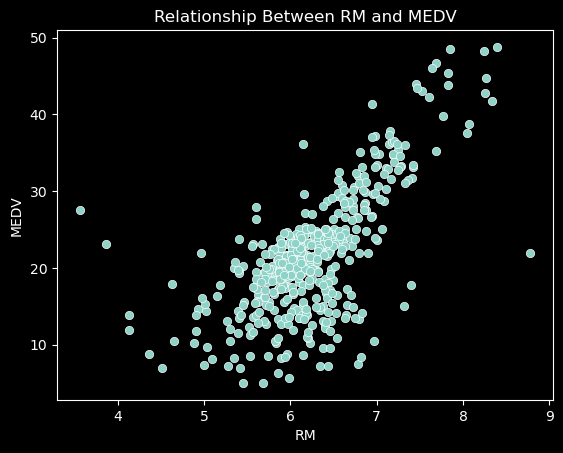

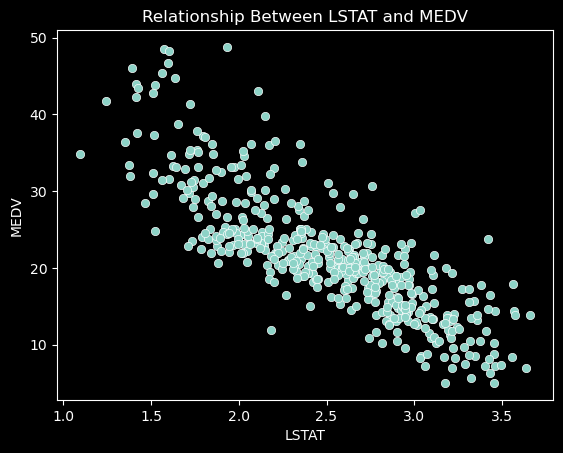

In [758]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of RM vs. MEDV
sns.scatterplot(x=boston_df['RM'], y=boston_df['MEDV'])
plt.title("Relationship Between RM and MEDV")
plt.show()

sns.scatterplot(x=boston_df['LSTAT'], y=boston_df['MEDV'])
plt.title("Relationship Between LSTAT and MEDV")
plt.show()


## Automate Checks for Key Predictors
To save time, automate these checks for important features:

Correlation Before and After:

In [759]:
''' important_features = ['RM', 'LSTAT', 'TAX']  # Example
for feature in important_features:
    print(f"Correlation of {feature} with MEDV (Before):", data_original[feature].corr(data_original['MEDV']))
    print(f"Correlation of {feature} with MEDV (After):", data_transformed[feature].corr(data_transformed['MEDV']))


SyntaxError: incomplete input (3436716962.py, line 1)

# 3. Feature Selection

## (H) Feature Importance with Models

### Training a model (e.g., Random Forest or Linear Regression) to assess the importance of the interaction features relative to other predictors.

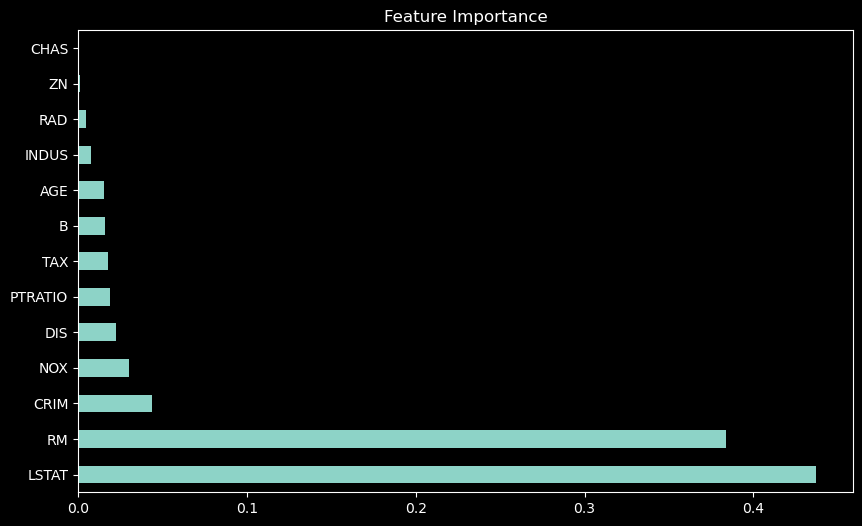

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X = boston_df.drop(columns=['MEDV'])
y = boston_df['MEDV']

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


it is clear that the most influential features for predicting MEDV are:

LSTAT (% lower status of the population)
RM (average number of rooms per dwelling)

Other features, such as CRIM, NOX, and DIS, have some influence but are significantly less important compared to LSTAT and RM.

# (I) Create Interaction Features

#### Interaction features can be useful when the relationship between two features impacts the target in combination. Since LSTAT and RM are highly influential, creating interaction terms between them and other features might reveal additional insights.

## obsservation
Interaction Feature improved model performance a lot.
When to Perform Interaction Terms is when suspect non-linear relationships or combined effects (e.g., RM and LSTAT might jointly impact MEDV).
Important predictors (LSTAT and RM) interact with other features (e.g., AGE or DIS).
 
#### (J) Create Binned Features (not used).
#### (k) One-Hot Encoding for Categorical Variables (not used).

In [763]:
# Create interaction features
boston_df['RM_LSTAT'] = boston_df['RM'] * boston_df['LSTAT']  # Interaction between RM and LSTAT
boston_df['RM_AGE'] = boston_df['RM'] * boston_df['AGE']  # Interaction between RM and AGE
boston_df['LSTAT_DIS'] = boston_df['LSTAT'] * boston_df['DIS']  # Interaction between LSTAT and DIS


In [764]:
# Check correlation of interaction features with MEDV
interaction_features = ['RM_LSTAT', 'RM_AGE', 'LSTAT_DIS']  # Replace with your actual interaction features
for feature in interaction_features:
    corr = boston_df[feature].corr(boston_df['MEDV'])
    print(f"Correlation between {feature} and MEDV: {corr}")


Correlation between RM_LSTAT and MEDV: -0.6501612246523683
Correlation between RM_AGE and MEDV: -0.3334691313882699
Correlation between LSTAT_DIS and MEDV: -0.19679720509902168


## Observation

Interpretation of Correlation Values

A. RM_LSTAT (-0.65)

This interaction term has a strong negative correlation with MEDV.
Since both RM (positive correlation with MEDV) and LSTAT (negative correlation with MEDV) are important individual predictors, their interaction likely captures the joint effect of:
Houses with more rooms in lower-status neighborhoods having lower prices.
Conclusion: RM_LSTAT is likely a highly useful feature for modeling MEDV.

B. RM_AGE (-0.33)
This term has a moderate negative correlation with MEDV

C. LSTAT_DIS (-0.19)
This term has a weak negative correlation with MEDV

In [765]:
# Drop LSTAT_DIS from the dataset
boston_df = boston_df.drop(columns=['LSTAT_DIS'])


In [766]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 505
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      490 non-null    float64
 1   ZN        490 non-null    float64
 2   INDUS     490 non-null    float64
 3   CHAS      490 non-null    int64  
 4   NOX       490 non-null    float64
 5   RM        490 non-null    float64
 6   AGE       490 non-null    float64
 7   DIS       490 non-null    float64
 8   RAD       490 non-null    int64  
 9   TAX       490 non-null    float64
 10  PTRATIO   490 non-null    float64
 11  B         490 non-null    float64
 12  LSTAT     490 non-null    float64
 13  MEDV      490 non-null    float64
 14  RM_LSTAT  490 non-null    float64
 15  RM_AGE    490 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 65.1 KB


## (H) RE-Evaluate Feature Importance with models

After retaining the most relevant interaction features, re-evaluate feature importance using models like Random Fores

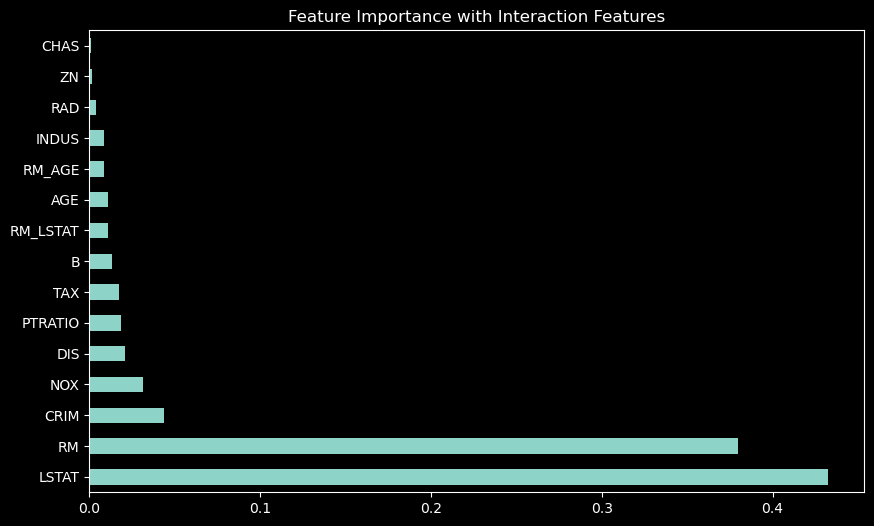

In [767]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define features and target
X = boston_df.drop(columns=['MEDV'])  # Exclude target variable
y = boston_df['MEDV']

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance with Interaction Features")
plt.show()


# 4. Model Building
## (J) Compare Model Performance

Train models with and without interaction features to assess their impact on performance metrics like R² and RMSE.

In [768]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Train-Test Split
X = boston_df.drop(columns=['MEDV'])  # Include retained interaction features
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with interaction features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("R² with Interaction Features:", r2_score(y_test, y_pred))
print("RMSE with Interaction Features:", mean_squared_error(y_test, y_pred, squared=False))

# Train model without interaction features
X_train_no_interaction = X_train.drop(columns=['RM_LSTAT', 'RM_AGE'])  # Drop interaction features
X_test_no_interaction = X_test.drop(columns=['RM_LSTAT', 'RM_AGE'])

model_no_interaction = LinearRegression()
model_no_interaction.fit(X_train_no_interaction, y_train)
y_pred_no_interaction = model_no_interaction.predict(X_test_no_interaction)

print("R² without Interaction Features:", r2_score(y_test, y_pred_no_interaction))
print("RMSE without Interaction Features:", mean_squared_error(y_test, y_pred_no_interaction, squared=False))


R² with Interaction Features: 0.8363626324119592
RMSE with Interaction Features: 2.89127538729054
R² without Interaction Features: 0.7975902803573149
RMSE without Interaction Features: 3.2156139098362155


## Interpretation of Results
### A. R² (Coefficient of Determination)

* With Interaction Features: 0.836
This means 83.6% of the variance in MEDV is explained by the model with interaction features.
* Without Interaction Features: 0.798
Only 79.8% of the variance is explained without interaction features.

-Improvement: +3.8%

The interaction features help the model explain more variability in housing prices.

### B. RMSE (Root Mean Squared Error)

* With Interaction Features: 2.89
The average prediction error is approximately $2,890.

* Without Interaction Features: 3.22
The average prediction error is approximately $3,220.

-Improvement: -$330

The interaction features reduce the prediction error, which is a significant improvement.

# 5.Feature Scaling (OPTIONAL)
## (K) Min-Max Scaling or standarization

### Min-Max Scaling transforms the data into a fixed range, typically [0, 1], by applying the formula.Preferred for algorithms like KNN or Neural Networks.
 
### For models like Linear Regression, Logistic Regression, SVM, and KNN.

In [772]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Define the features to scale (exclude the target variable 'MEDV')
features = boston_df.drop(columns=['MEDV']).columns

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
data_scaled = pd.DataFrame(scaler.fit_transform(boston_df[features]), columns=features)

# Add the target variable back
data_scaled['MEDV'] = boston_df['MEDV']

# Display the first few rows
print(data_scaled.head())


       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.972687  0.058148   0.0  0.314815  0.577505  0.641607  0.478107   
1  0.033599  0.000000  0.234444   0.0  0.172840  0.547998  0.782698  0.565690   
2  0.033568  0.000000  0.234444   0.0  0.172840  0.694386  0.599382  0.565690   
3  0.041343  0.000000  0.053333   0.0  0.150206  0.658555  0.441813  0.658514   
4  0.093754  0.000000  0.053333   0.0  0.150206  0.687105  0.528321  0.658514   

        RAD       TAX   PTRATIO         B     LSTAT  RM_LSTAT    RM_AGE  MEDV  
0  0.000000  0.208015  0.287234  0.000000  0.270919  0.289792  0.546295  24.0  
1  0.043478  0.104962  0.553191  0.000000  0.476323  0.499697  0.650366  21.6  
2  0.043478  0.104962  0.553191  0.003660  0.203626  0.279546  0.560069  34.7  
3  0.086957  0.066794  0.648936  0.002034  0.108624  0.144029  0.401819  33.4  
4  0.086957  0.066794  0.648936  0.000000  0.293044  0.386110  0.491109  36.2  


In [773]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Train-Test Split
X = data_scaled.drop(columns=['MEDV'])  # Include retained interaction features
y = data_scaled['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model with interaction features
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("R² with Interaction Features:", r2_score(y_test, y_pred))
print("RMSE with Interaction Features:", mean_squared_error(y_test, y_pred, squared=False))

# Train model without interaction features
X_train_no_interaction = X_train.drop(columns=['RM_LSTAT', 'RM_AGE'])  # Drop interaction features
X_test_no_interaction = X_test.drop(columns=['RM_LSTAT', 'RM_AGE'])

model_no_interaction = LinearRegression()
model_no_interaction.fit(X_train_no_interaction, y_train)
y_pred_no_interaction = model_no_interaction.predict(X_test_no_interaction)

print("R² without Interaction Features:", r2_score(y_test, y_pred_no_interaction))
print("RMSE without Interaction Features:", mean_squared_error(y_test, y_pred_no_interaction, squared=False))


ValueError: Input y contains NaN.

## Standardization scaling
Standardization (Z-Score Scaling)
Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
This method is useful for algorithms that assume normally distributed features (e.g., PCA, Linear Regression).

In [770]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the features to standardize (exclude the target variable 'MEDV')
features = boston_df.drop(columns=['MEDV']).columns

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization
data_standardized = pd.DataFrame(scaler.fit_transform(boston_df[features]), columns=features)

# Add the target variable back
data_standardized['MEDV'] = boston_df['MEDV']

# Display the first few rows
print(data_standardized.head())


       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -1.219120  1.644725 -1.291856 -0.250812 -0.139895  0.505040 -0.109432   
1 -1.120878 -0.597730 -0.593329 -0.250812 -0.731821  0.269017  0.377488   
2 -1.120968 -0.597730 -0.593329 -0.250812 -0.731821  1.439934 -0.255152   
3 -1.098235 -0.597730 -1.310933 -0.250812 -0.826186  1.153335 -0.798939   
4 -0.944989 -0.597730 -1.310933 -0.250812 -0.826186  1.381694 -0.500390   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  RM_LSTAT  \
0  0.337065 -0.980635 -0.667101 -1.527280 -0.352982 -1.379637 -1.420830   
1  0.724101 -0.865459 -0.988734 -0.341504 -0.352982 -0.361695 -0.211574   
2  0.724101 -0.865459 -0.988734 -0.341504 -0.336945 -1.713126 -1.479860   
3  1.134294 -0.750284 -1.107857  0.085376 -0.344071 -2.183940 -2.260566   
4  1.134294 -0.750284 -1.107857  0.085376 -0.352982 -1.269992 -0.865948   

     RM_AGE  MEDV  
0  0.041696  24.0  
1  0.493974  21.6  
2  0.101554  34.7  
3 -0.586177  33.4 